In [79]:
import math
import random
import numpy as np
from numpy import linalg as LNG 
import matplotlib.pyplot as plt


def GeneratePoints(numPoints, numCharges, qPoints, Cr, Cx, Cy, Q):
    """
    INPUTS:
        numPoints:      This is the number of points to create in the simulation
        numCharges:     This is the number of charges to create in the simulation
        qPoints:        Array of all the charges location and charge
        Cr:             Radious of the circle
        Cx:             X position of the circle's origin
        Cy:             Y position of the circle's origin
        Q:              The total charge to be distributed evenly accross the charges
        pPoints:        Array of all the positions to calculate the magnatude electric field

    RETURNS:
        qPoints:        
        pPoints:

    COMMENTS:
        This function generates numCharges of charges around the area of a circle and the points to measure the electric
        field at.  It the adds them to a numpy arrays and returns thoes arrays

    """
    #Break up the total charge between charge points
    q = Q                                #Divided up the total charge between points
    Px = 0                                          #X coordinate used for calculateions
    Py = 0                                          #y coordinate used for calculateions
    for i in range(numCharges):
        theta = 2 * math.pi * random.random()       #generate a random angle 
        chargeX = Cr * math.cos(theta) + Cx         #set points x coordinate
        chargeY = Cr * math.sin(theta) + Cy         #set points y coordinate
        #set values for the point x and y position and the charge q
        qPoints[i,0] = chargeX                       
        qPoints[i,1] = chargeY
        qPoints[i,2] = q                        #this is a place holder for charge
    #This was used to generate random points for calculate the magnetic field.  it is commented out and set poins will be generated
    #for j in range(numPoints):
        #theta = 2 * math.pi * random.random()               #generate a random angle
        #rad = Cr * math.sqrt(random.random() * 10)          #generate a random radious length
        #Px = rad * math.cos(theta) + Cx                     #generate point's x coordinate
        #Py = rad * math.sin(theta) + Cy                     #generate point's y coordinate
        #set the values for x and y position of the test points
        #pPoints[j,0] = Px                       
        #pPoints[j,1] = Py
    

    return qPoints 

 
def FieldCalc(numCharges, numPoints, qPoints, pPoints):
    """
    INPUTS:
        numCharges:      The number of charges there are creating the electric field
        numPoints:       Number of points to measure electric field
        qPoints:         Array of all the charge locations and charge
        pPoints:         x and y coordinates for the position where the field will be calculated

    RETURNS:
        E:               Array of field componants and magnatude

    COMMENTS:
        This function Calculates the x and y componants as well as the magnatuse of the electric field at each point in pPoints

        
    """
    
    #Constants  
    K = 9e9                          #Coulomb constant 
    eFieldX = 0                      #Total electric field x  
    eFieldY = 0                      #Total electric field y
    E = np.zeros((numPoints,3))  #NumPy array for storing the electric field from each charge
   
    for i in range(0,numPoints):
        for j in range(numCharges):
            #Solve r vector for each point in the array
            rVec = np.array([[pPoints[i,0] - qPoints[j,0]], [pPoints[i,1] - qPoints[j,1]]])  
            #print(rVec)
            #solve for the magnitued of rVec
            rNorm = LNG.norm(rVec)
            rMag = rNorm ** 2
            #print(rNorm, " norm")
            #solve for rHat
            rHat = np.divide(rVec, rNorm)
            #print(rHat,)
            #Calculate the field from the current charge at current point p
            eField = (K*qPoints[j,2]/numCharges*rHat)/rMag
            #store eField values in an array to be returned
            E[i,0] += eField[0]
            E[i,1] += eField[1]
        E[i,2] = math.sqrt(E[i,0] ** 2 + E[i,1] ** 2)
    
    return E
# End of FieldCalc function


### Testing the charge placement 
In the following cell we will plot a large number of charges to show that they are on a circle with radius Cr centered at (0,0)

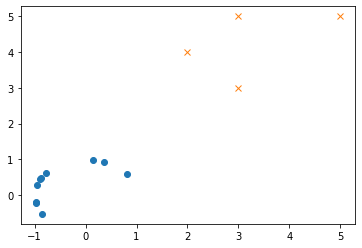

In [84]:
#User input varables

numCharges = 10        #Number of charge point to generate
numPoints = 4            #Number of points to generate to calculate the field at *****(MUST MATCH # OF POINTS in pPoints function)****
Q = 12e-6                #Total Charge
Cx = 0                   #Circle center x coordinate
Cy = 0                   #Circle center y coordinate
Cr = 1                   #Circle radius
eFieldX = 0              #Total electric field x  
eFieldY = 0              #Total electric field y
eMag = 0                 #Total magnatue of the electric field
qPoints = np.zeros((numCharges,3))  #Create a numpy array to hold the charge points 
pPoints = np.zeros((numPoints,2))   #Create a numpy array to hold the test points
pPoints[0,0], pPoints[0,1] = 3,3
pPoints[1,0], pPoints[1,1] = 2,4
pPoints[2,0], pPoints[2,1] = 5,5
pPoints[3,0], pPoints[3,1] = 3,5
xChargePoints = np.zeros(([numCharges,1]))
yChargePoints = np.zeros(([numCharges,1]))
Ex = np.zeros(([numPoints,1]))
Ey = np.zeros(([numPoints,1]))
Px = np.zeros(([numPoints,1]))
Py = np.zeros(([numPoints,1]))

#generate points and calculate the field  
qPoints = GeneratePoints(numPoints,numCharges,qPoints,Cr,Cx,Cy,Q)     #Call the function to generate point charges

E = FieldCalc(numCharges, numPoints, qPoints, pPoints)  #Call the function to calculate the E field point P
for g in range(numCharges):
    #break up x and y point into seperate arrays
    xChargePoints[g] = qPoints[g,0]
    yChargePoints[g] = qPoints[g,1]
for k in range(numPoints):
    #Seperate the electric field into x and y componants
    Ex[k] = E[k,0]
    Ey[k] = E[k,1]
    Px[k] = pPoints[k,0]
    Py[k] = pPoints[k,1]

fig = plt.figure()

plt.plot(xChargePoints, yChargePoints, 'o')
plt.plot(Px, Py,'x')
plt.show()
    
    

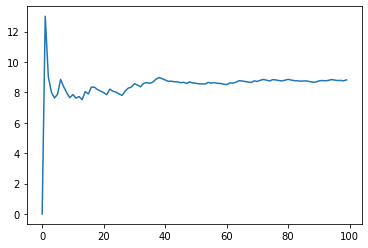

In [94]:
#User input varables

numCharges = 100         #Number of charge point to generate
numPoints =  1           #Number of points to generate to calculate the field at *****(MUST MATCH # OF POINTS in pPoints function)****
Q = 12e-9                #Total Charge
Cx = 0                   #Circle center x coordinate
Cy = 0                   #Circle center y coordinate
Cr = 1                   #Circle radius
eFieldX = 0              #Total electric field x  
eFieldY = 0              #Total electric field y
eMag = 0                 #Total magnatue of the electric field
qPoints = np.zeros((numCharges,3))  #Create a numpy array to hold the charge points 
pPoints = np.zeros((numPoints,2))   #Create a numpy array to hold the test points
fieldSim = np.zeros((numCharges,1))
pPoints[0,0], pPoints[0,1] = 3,2
#pPoints[1,0], pPoints[1,1] = .5,2
#pPoints[2,0], pPoints[2,1] = .5,.75
#pPoints[3,0], pPoints[3,1] = 6,3
#pPoints[4,0], pPoints[4,1] = 4,7
#generate points and calculate the field  

qPoints = GeneratePoints(numPoints,numCharges,qPoints,1,Cx,Cy,Q)     #Call the function to generate point charges
# call the function starting from 1 charge to numCharges of charges 
for k in range(numCharges):
    
    E = FieldCalc(k, numPoints, qPoints, pPoints)  #Call the function to calculate the E field @ points
    fieldSim[k] = E[0,2]
    

#print(fieldSim)
fig = plt.figure()
plt.plot(fieldSim)
plt.show()